### Identify rows with null in any column

In [5]:
import pandas as pd
weather_org = pd.read_csv('pittsburgh2013.csv')
weather_org = weather_org.loc[:,['Date','Mean TemperatureF', 'Max Gust SpeedMPH', 'Events']]
weather_org.columns = ['date','temp','speed','events']
# Identify and print the the rows with null values
nulls = weather_org[weather_org.isnull().any(axis=1)]
print(nulls.head())

       date  temp  speed events
0  2013-1-1    28    NaN   Snow
1  2013-1-2    21    NaN    NaN
2  2013-1-3    24   26.0    NaN
3  2013-1-4    28   32.0    NaN
4  2013-1-5    30   23.0    NaN


### Emputation

In [2]:
weather = weather_org.copy()
# Impute constant value 0 and print the head
weather.fillna(0, inplace=True)
print(weather.head())

       Date  Mean TemperatureF  Max Gust SpeedMPH Events
0  2013-1-1                 28                NaN   Snow
1  2013-1-2                 21                NaN    NaN
2  2013-1-3                 24               26.0    NaN
3  2013-1-4                 28               32.0    NaN
4  2013-1-5                 30               23.0    NaN
       Date  Mean TemperatureF  Max Gust SpeedMPH Events
0  2013-1-1                 28                0.0   Snow
1  2013-1-2                 21                0.0      0
2  2013-1-3                 24               26.0      0
3  2013-1-4                 28               32.0      0
4  2013-1-5                 30               23.0      0


In [6]:
weather = weather_org.copy()
# Impute median price and print the head
weather.fillna(weather['speed'].median(), inplace=True)
print(weather.head())

       date  temp  speed events
0  2013-1-1    28   24.0   Snow
1  2013-1-2    21   24.0     24
2  2013-1-3    24   26.0     24
3  2013-1-4    28   32.0     24
4  2013-1-5    30   23.0     24


### Drop null values

In [7]:
weather = weather_org.copy()
# Drop each row with a null value and print the head
weather.dropna(inplace=True)
print(weather.head())

         date  temp  speed    events
5    2013-1-6    34   22.0      Snow
8    2013-1-9    36   25.0      Rain
11  2013-1-12    55   18.0  Fog-Rain
12  2013-1-13    62   26.0      Rain
13  2013-1-14    44   32.0      Rain


### Drop outliers

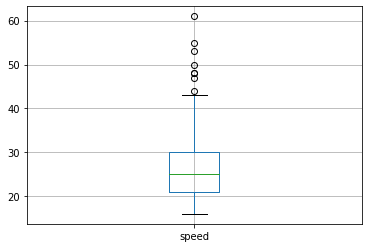

In [15]:
import matplotlib.pyplot as plt
# Visualize the relationship with price
weather.boxplot('speed', rot=0)
plt.show()

In [14]:
# Calculate the mean and std
mean, std = weather['speed'].mean(), weather['speed'].std()

# Compute and print the upper and lower threshold
cut_off = 3 * std
lower, upper = mean - cut_off, mean + cut_off
print(lower, 'to', upper)

# Identify and print rows with outliers
outliers = weather[(weather['speed'] > upper) | 
                   (weather['speed'] < lower)]
print(outliers)

# Drop the rows from the dataset
weather = weather[(weather['speed'] <= upper) | 
                  (weather['speed'] >= lower)]

1.8220504190012328 to 51.599333228797505
          date  temp  speed                 events
105  2013-4-16    66   53.0  Fog-Rain-Thunderstorm
190  2013-7-10    76   55.0  Fog-Rain-Thunderstorm
304  2013-11-1    60   61.0                   Rain
